<a href="https://colab.research.google.com/github/Haris-Ali007/Deep-Learning/blob/main/Running_Yolov4_using_darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setting Up Darknet
An official tutorial for setting up yolov4 in colab exists [here](https://colab.research.google.com/drive/12QusaaRj_lUwCGDvQNfICpa7kA7_a2dE#scrollTo=q2Jjv0yRKLPe). 

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 17.78 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
# install LIBSO to make .so file
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old ==

In [ ]:
# downloading weights
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-csp.weights

--2022-01-19 07:19:20--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4-csp.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13476 (13K) [text/plain]
Saving to: ‘yolov4-csp.cfg’

yolov4-csp.cfg      100%[===================>]  13.16K  --.-KB/s    in 0s      

2022-01-19 07:19:21 (38.0 MB/s) - ‘yolov4-csp.cfg’ saved [13476/13476]



##Running detection using yolov4

In [ ]:
import darknet
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
network, class_names, colors = darknet.load_network('cfg/yolov4-csp.cfg', 
                                            'cfg/coco.data',
                                            'yolov4-csp.weights')
net_width = network_width(network)
net_height = network_height(network)

In [ ]:
image = cv2.imread('/content/business-people-handshake-office-97226055.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (net_width, net_height), interpolation=cv2.INTER_LINEAR)

In [ ]:
darknet_image = darknet.make_image(net_width, net_height, 3)
darknet.copy_image_from_bytes(darknet_image, image.tobytes())
predictions = darknet.detect_image(network, class_names, darknet_image)

In [ ]:
darknet.print_detections(predictions)


Objects:
pottedplant: 51.51%
person: 60.05%
chair: 65.72%
cell phone: 73.42%
pottedplant: 75.55%
person: 78.94%
chair: 80.99%
person: 82.89%
mouse: 86.08%
cup: 89.02%
laptop: 90.98%


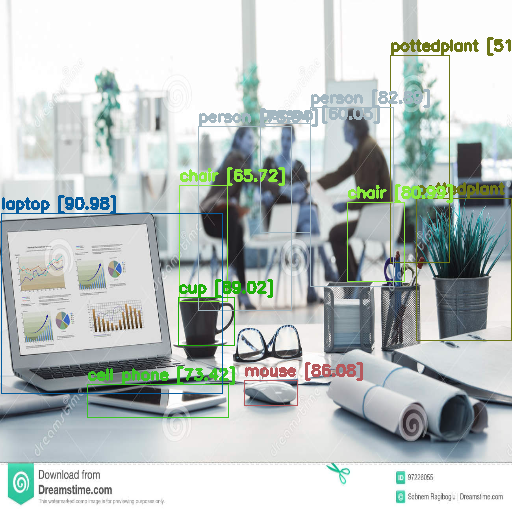

In [ ]:
output = draw_boxes(predictions, image, colors)
cv2_imshow(output)